In [4]:
from cosmocalc import cosmocalc

cosmocalc(3, H0=75, WM=.25)

{'z': 3,
 'H0': 75,
 'WM': 0.25,
 'WV': 0.7499259555555555,
 'WK': 0.0,
 'WR': 7.404444444444445e-05,
 'DA': 0.39103776375786625,
 'DA_Gyr': 5.098089672032555,
 'DA_Mpc': 1563.0689649039205,
 'DA_cm': 4.823126863038779e+27,
 'DL': 6.25660422012586,
 'DL_Gyr': 81.56943475252088,
 'DL_Mpc': 25009.103438462727,
 'DL_cm': 7.717002980862046e+28,
 'DCMR': 1.564151055031465,
 'DCMR_Gyr': 20.39235868813022,
 'DCMR_Mpc': 6252.275859615682,
 'DCMR_cm': 1.9292507452155115e+28,
 'PS_kpc': 7.577972196109502,
 'PS_cm': 2.338317891729323e+22,
 'DTT': 0.8482637908431703,
 'DTT_Gyr': 11.059097795819358,
 'VCM': 1.2756009121294902,
 'VCM_Gpc3': 1023.7714254161302,
 'age': 1.0133755371756261,
 'age_Gyr': 13.211714670004362,
 'zage': 0.1651117463324558,
 'zage_Gyr': 2.1526168741850036}

# Importance of Peculiar Velocity compared to Hubble flow

Trying to represent graphically that the peculiar velocity is not as important for long distances.

This first try is ploting a line where  vr = factor * vp, so to compare how distance an object needs to be to reach a factor ($\alpha$ = 0.5, 1.0, 2.0, 4.0) of the peculiar velocity

$$d(v_p) = \frac{\alpha v_p}{H_0}$$

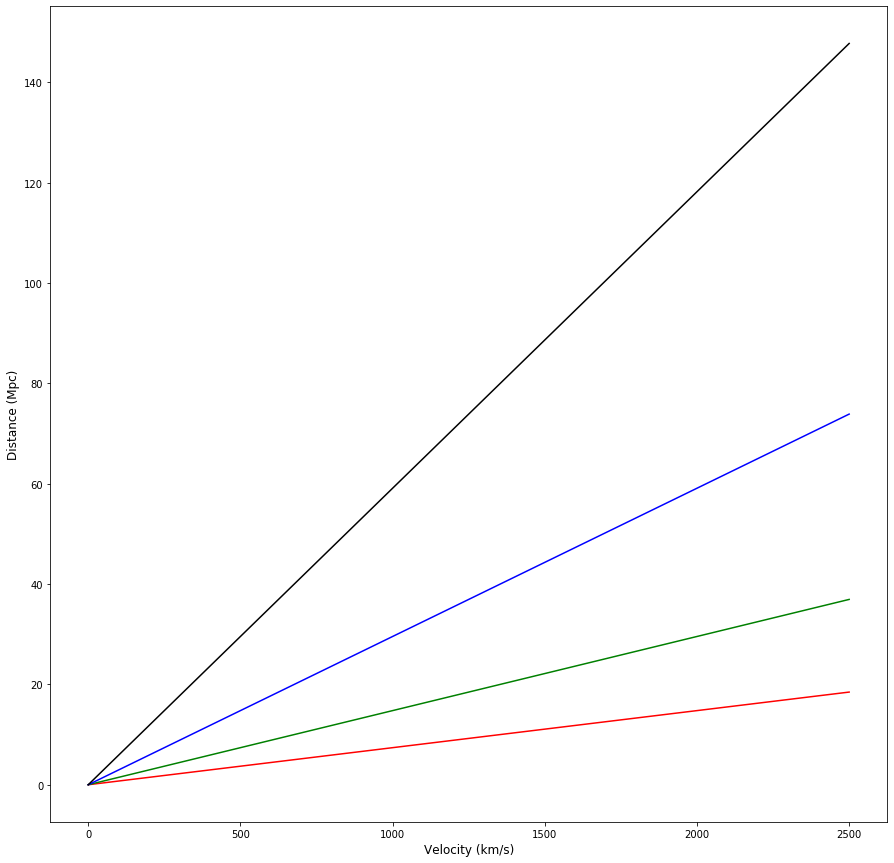

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
H_0 = 67.66
vp = np.arange(0.0, 2500.0, 0.5)
d_1 = 0.5*vp/H_0
d_2 = vp/H_0
d_3 = 2.0*vp/H_0
d_4 = 4.0*vp/H_0

fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlabel("Velocity (km/s)", size='large')
ax.set_ylabel("Distance (Mpc)", size='large')
ax.plot(vp, d_1, color='red')
ax.plot(vp, d_2, color='green')
ax.plot(vp, d_3, color='blue')
ax.plot(vp, d_4, color='black')

plt.show()

Let's just consider the fraction of perculiar velocity by hubble flow, like

$$ f(d) = \frac{v_p}{H_0 d} $$

Now we can see how it contributes less and less to the corrections. Also, if we divide it by $c$ it is roughly tells the redshift correction, so then we can determine a cutoff.

$$ z_{v_p}(d) = \frac{v_p}{H_0 d c} $$

In [2]:
def cosmocalc_DL_Mpc(z, H0=71, WM=0.27, WV=None, n=1000):
    c = 299792.458

    z = np.array(z)
    z = z.reshape((z.size, 1))

    if WV is None:
        WV = 1.0 - WM - 0.4165/(H0*H0)  # Omega(vacuum) or lambda

    h = H0/100.0
    WR = 4.165E-5/(h*h)   # includes 3 massless neutrino species, T0 = 2.72528
    WK = 1.0 - WM - WR - WV
    az = 1.0/(1.0 + 1.0*z)

    points = np.arange(n)

    # do integral over a=1/(1+z) from az to 1 in n steps, midpoint rule
    a = az + (1 - az)*(points + 0.5)/n
    adot = np.sqrt(WK + (WM/a) + (WR/np.power(a, 2)) + (WV*np.power(a, 2)))
    DCMR = np.sum(1.0/(a*adot), axis=1)
    DCMR = ((1.0 - az)[:].T*DCMR[:])/n

    x = np.sqrt(np.absolute(WK))*DCMR
    x = x.reshape((x.size,))
    yes = np.where(x > 0.1)
    if WK > 0:
        tan_ratio_yes = np.sinh(x[yes])/x[yes]
    else:
        tan_ratio_yes = np.sin(x[yes])/x[yes]

    no = np.where(x <= 0.1)
    y = np.power(x[no], 2)
    if WK < 0:
        y = -y
    tan_ratio_no = 1.0 + y/6.0 + np.power(y, 2)/120.0

    tan_ratio = np.zeros(x.size)
    tan_ratio[yes] = tan_ratio_yes
    tan_ratio[no] = tan_ratio_no

    DCMT = tan_ratio*DCMR

    DA = az[:].T*DCMT[:]
    DL = (1/np.power(az, 2))[:].T*DA[:]

    DL_Mpc = c/H0*DL

    return DL_Mpc[0]

343.8535073040945
314.26622050783504
[8.36581239e-06]
[8.36580512e-06]


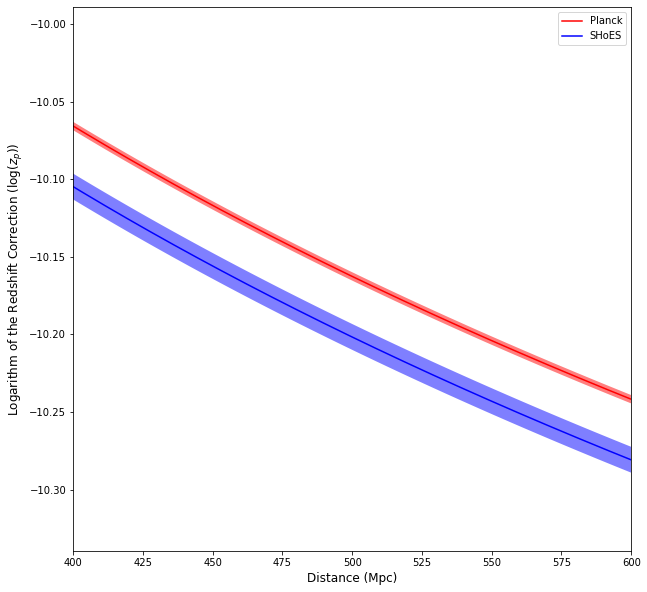

In [14]:
import matplotlib.pyplot as plt
import numpy as np
#from cosmocalc import cosmocalc

H_0_p = 67.66
err_H_0_p = 0.42
H_0_s = 74.03
err_H_0_s = 1.42
c = 299792458.0
vp = 697.471

d = np.arange(350, 650.0, 0.5)

v_hubble_p_per_c = (d*H_0_p)/c
v_hubble_p_p_per_c = (d*(H_0_p + err_H_0_p))/c
v_hubble_p_m_per_c = (d*(H_0_p - err_H_0_p))/c

z_p =  np.sqrt((1.0 + v_hubble_p_per_c)/(1.0 - v_hubble_p_per_c)) - 1.0
z_p_p =  np.sqrt((1.0 + v_hubble_p_p_per_c)/(1.0 - v_hubble_p_p_per_c)) - 1.0
z_p_m =  np.sqrt((1.0 + v_hubble_p_m_per_c)/(1.0 - v_hubble_p_m_per_c)) - 1.0

v_hubble_s_per_c = (d*H_0_s)/c
v_hubble_s_p_per_c = (d*(H_0_s + err_H_0_s))/c
v_hubble_s_m_per_c = (d*(H_0_s - err_H_0_s))/c

z_p =  np.sqrt((1.0 + v_hubble_s_per_c)/(1.0 - v_hubble_s_per_c)) - 1.0
z_p_p =  np.sqrt((1.0 + v_hubble_s_p_per_c)/(1.0 - v_hubble_s_p_per_c)) - 1.0
z_p_m =  np.sqrt((1.0 + v_hubble_s_m_per_c)/(1.0 - v_hubble_s_m_per_c)) - 1.0


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("Distance (Mpc)", size='large')
ax.set_ylabel("Logarithm of the Redshift Correction (log($z_p$))", size='large')
#ax.set_ylim(-10.2, -9.8)
ax.set_xlim(400, 600)

ax.plot(d, z_p, color='red', label='Planck')
ax.fill_between(d, z_p_p, z_p_m, color='red', alpha=0.5, linewidths=0.0)

ax.plot(d, z_s, color='blue', label='SHoES')
ax.fill_between(d, z_s_p, z_s_m, color='blue', alpha=0.5, linewidths=0.0)
plt.legend(loc='upper right')


d_cutoff_p = vp/(H_0_p*c*1e-10)
d_cutoff_s = vp/(H_0_s*c*1e-10)

print(d_cutoff_p)
print(d_cutoff_s)

z = 0.9999911072025536565
err_z = 1e-9
dist_0 = cosmocalc_DL_Mpc(z, H0=67.66, WM=.3111, WV=.6889)
dist_1 = cosmocalc_DL_Mpc(z+err_z, H0=67.66, WM=.3111, WV=.6889)
dist_2 = cosmocalc_DL_Mpc(z-err_z, H0=67.66, WM=.3111, WV=.6889)

print(dist_1 - dist_0)
print(dist_0 - dist_2)


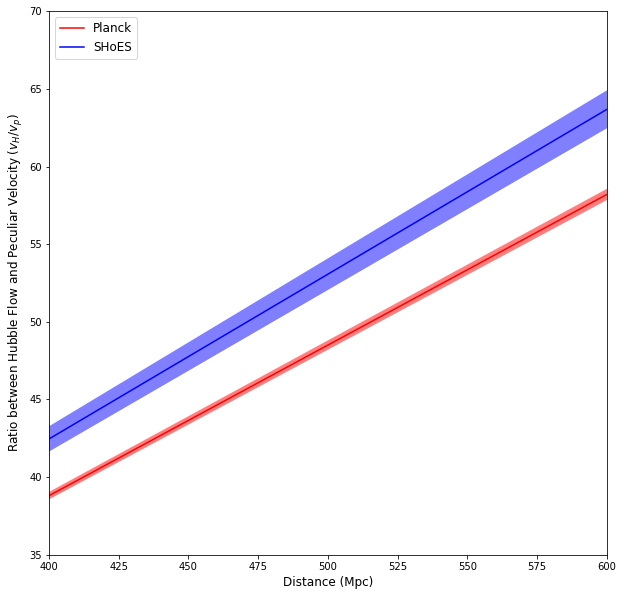

In [20]:
import matplotlib.pyplot as plt
import numpy as np

H_0_p = 67.66
err_H_0_p = 0.42
H_0_s = 74.03
err_H_0_s = 1.42
c = 299792458.0
vp = 697.471

d = np.arange(350.0, 650.0, 0.5)

v_H_p = (H_0_p*d)/vp
v_H_p_p = ((H_0_p + err_H_0_p)*d)/vp
v_H_p_m = ((H_0_p - err_H_0_p)*d)/vp

v_H_s = (H_0_s*d)/vp
v_H_s_p = ((H_0_s + err_H_0_s)*d)/vp
v_H_s_m = ((H_0_s - err_H_0_s)*d)/vp

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("Distance (Mpc)", size='large')
ax.set_ylabel("Ratio between Hubble Flow and Peculiar Velocity ($v_H$/$v_p$)", size='large')
ax.set_ylim(35, 70)
ax.set_xlim(400, 600)

ax.plot(d, v_H_p, color='red', label='Planck')
ax.fill_between(d, v_H_p_p, v_H_p_m, color='red', alpha=0.5, linewidths=0.0)

ax.plot(d, v_H_s, color='blue', label='SHoES')
ax.fill_between(d, v_H_s_p, v_H_s_m, color='blue', alpha=0.5, linewidths=0.0)
plt.legend(loc='upper left', prop={'size': 'large'})

plt.show()


Considereing a galaxy that had a peculiar velocity of $ 500 \, km/s $, the redshit correction is in the order of  $10^{-10}$ if the galaxy is around $ 250 \, Mpc$, and this means a distance correction in the order of $10^{-1} \, pc$. 

Since $ 500 \, km/s $ is a usual velocity, it is possible to consider that corrections over $ 250 \, Mpc$ is not that necessary anymore.

In [29]:
v_H = 67.66 * 500
beta = v_H/c
z = np.sqrt((1.0 + beta)/(1 - beta)) - 1.0
print(z)
print(cosmocalc_DL_Mpc(z, H0=67.66, WM=.3111, WV=.6889)[0])

vp = 697.471
beta = vp/c
z = np.sqrt((1.0 + beta)/(1 - beta)) - 1.0
print(z)
print(cosmocalc_DL_Mpc(z, H0=67.66, WM=.3111, WV=.6889)[0])

0.00011285110109104934
0.500071472516634
2.326515536665852e-06
0.010308499191579815


## Best method to find the maximum/mininum to plot maps

Methods:

1<sup>st</sup>: Absolute value of the list, then highest number

2<sup>nd</sup>: Highest and Lowest value, compare the ablsolute values

3<sup>rd</sup>: Sorting the list, first and last entry


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

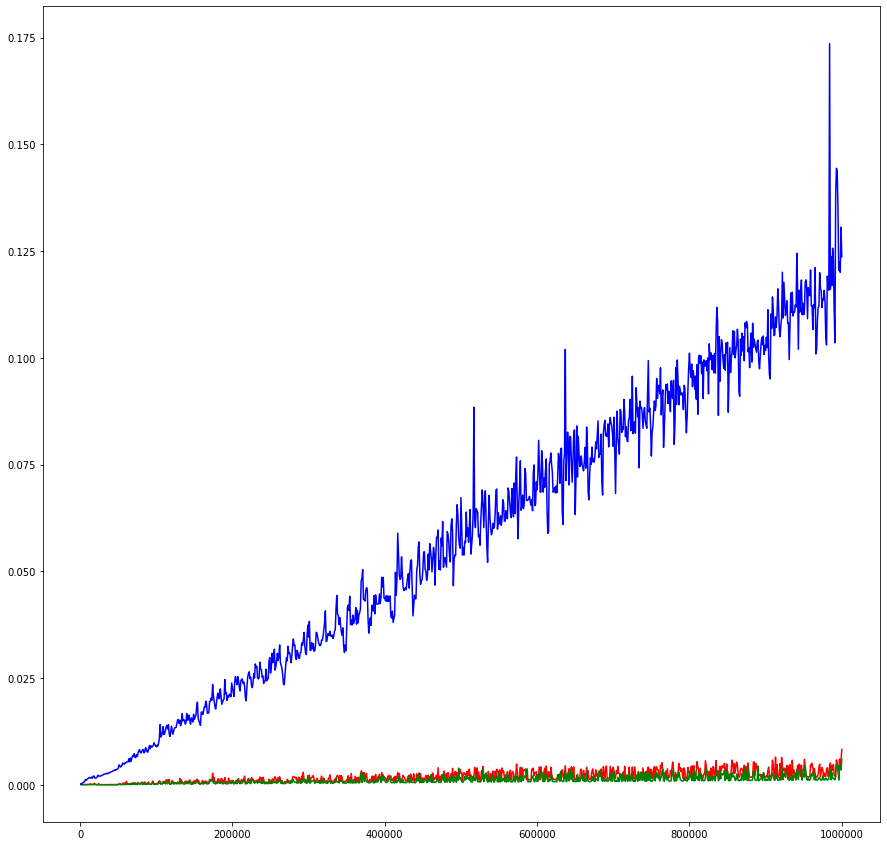

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time

def method_1(sample):
    data = np.absolute(sample)
    result = np.max(data)
    #print("Method 1: The max value is", result)
    
def method_2(sample):
    value_1 = np.max(sample)
    value_2 = np.min(sample)*(-1.0)
    if value_1 > value_2:
        result = value_1
    else:
        result = value_2
    #print("Method 2: The max value is", result)
    
def method_3(sample):
    data = np.sort(sample)
    value_1 = data[-1]
    value_2 = data[0]*(-1.0)
    if value_1 > value_2:
        result = value_1
    else:
        result = value_2
    #print("Method 3: The max value is", result)

execution_time_1 = []
execution_time_2 = []
execution_time_3 = []

size = range(1000, 1000001, 1000)

for n in size:
    print(n)
    sample = np.random.normal(0.0, 500.0, n)
    t1 = time.time()
    method_1(sample)
    execution_time_1.append(time.time() - t1)
    
    t2 = time.time()
    method_2(sample)
    execution_time_2.append(time.time() - t2)
    
    t3 = time.time()
    method_3(sample)
    execution_time_3.append(time.time() - t3)

fig, ax = plt.subplots(figsize=(15, 15))


ax.plot(size, execution_time_1, color='red')
ax.plot(size, execution_time_2, color='green')
ax.plot(size, execution_time_3, color='blue')

plt.show()

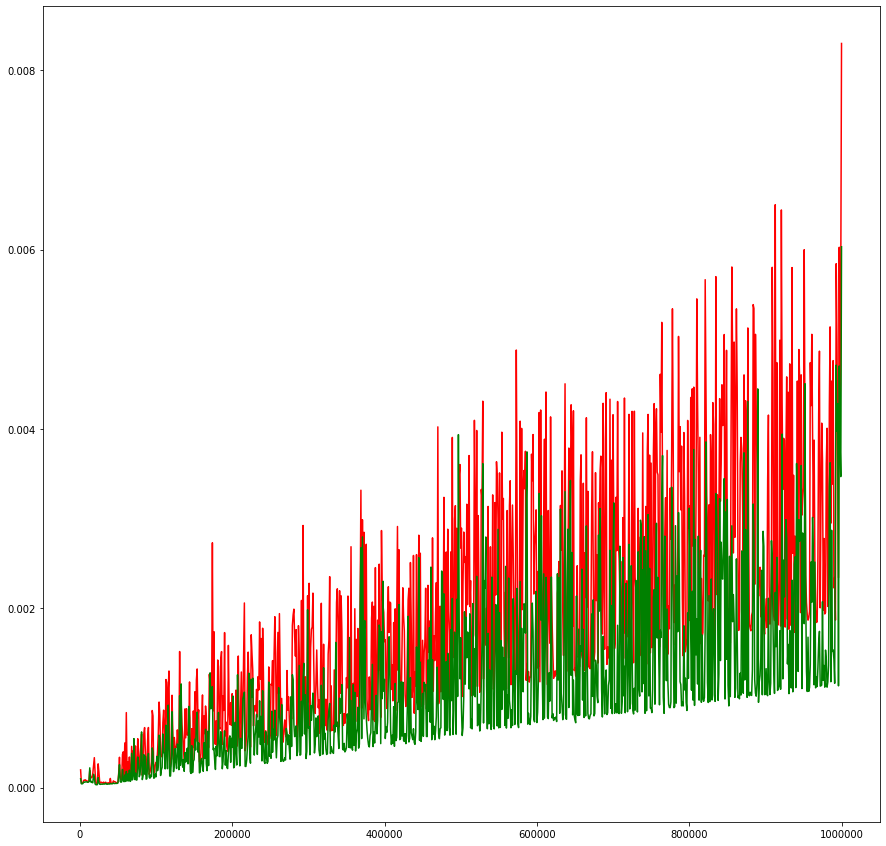

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))


ax.plot(size, execution_time_1, color='red')
ax.plot(size, execution_time_2, color='green')

plt.show()

The 2<sup>nd</sup> method is the winner by not that far from the 1<sup>st</sup>, the third clearly would be the loser, since it is $O(n \log n)$, the others are $O(n)$

In [16]:
import csv

with open('/media/gabriel/Data/University/ELTE/Thesis/Peculiar_Velocity_Catalogs/2MTF/Table_2.dat', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|', skipinitialspace=True)
    # Skip header
    for i in range(0, 9):
        next(reader)
    
    for row in reader:
        print(row)

['00005604+2020165', '6439', '-0.1274', '0.0777', '-0.1562', '0.0749', '-0.1603', '0.0799', '-2165.31', '388.89', '-2755.50', '475.86', '-2842.80', '523.66', '-1888.88', '1152.01', '-2315.88', '1110.49', '-2376.66', '1184.62', '--']
['00005891+2854421', '6546', '-0.0707', '0.0921', '-0.0570', '0.0885', '-0.0227', '0.0933', '-1145.45', '242.65', '-906.77', '183.74', '-340.14', '72.84', '-1065.64', '1388.20', '-859.15', '1333.94', '-342.15', '1406.28', '--']
['00010478+0432261', '8717', '-0.0611', '0.0910', '-0.0421', '0.0875', '-0.0414', '0.0922', '-1264.95', '265.05', '-837.87', '169.78', '-823.43', '174.43', '-1226.38', '1826.52', '-845.02', '1756.27', '-830.97', '1850.60', '--']
['00011976+3431326', '4694', '-0.0921', '0.0829', '-0.0813', '0.0793', '-0.0808', '0.0853', '-1106.20', '211.41', '-963.61', '175.28', '-956.39', '187.19', '-995.45', '896.01', '-878.72', '857.10', '-873.31', '921.95', '--']
['00013830+2329011', '3982', '-0.2177', '0.0755', '-0.1999', '0.0699', '-0.2117', '0.

['16101083+1641582', '4716', '-0.0893', '0.1037', '-0.1107', '0.1010', '-0.0798', '0.1059', '-1083.45', '259.45', '-1375.79', '319.96', '-957.61', '233.73', '-969.71', '1126.08', '-1202.09', '1096.76', '-866.55', '1149.97', '--']
['16103105+2729586', '9628', '-0.0509', '0.0792', '-0.0691', '0.0747', '-0.1007', '0.0804', '-1153.83', '209.89', '-1615.55', '279.00', '-2463.18', '453.74', '-1128.42', '1755.81', '-1531.90', '1656.05', '-2232.45', '1782.41', '--']
['16104465-0617458', '8857', '0.0077', '0.0823', '0.0119', '0.0786', '0.0039', '0.0845', '191.80', '36.21', '275.12', '50.05', '115.26', '22.29', '157.03', '1678.43', '242.69', '1602.97', '79.54', '1723.29', '--']
['16110754+3815048', '3875', '-0.0330', '0.1175', '-0.0350', '0.1180', '-0.0413', '0.1211', '-318.79', '85.88', '-337.51', '91.70', '-399.23', '111.23', '-294.44', '1048.40', '-312.29', '1052.86', '-368.50', '1080.52', '--']
['16113077+2348423', '9646', '0.1682', '0.0909', '0.1505', '0.0883', '0.1570', '0.0932', '3135.55'

In [3]:
test = dict()

test[34] = 0
test[35] = 1

print(test)

test[36] = 3

print(test)

test[34] = 2

print(test)

{34: 0, 35: 1}
{34: 0, 35: 1, 36: 3}
{34: 2, 35: 1, 36: 3}


In [6]:
import numpy as np

a = [1, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 9]
print(a)
np.random.shuffle(a)
print(a)
unique_a = np.unique(a)
print(unique_a)
print(len(a), unique_a.size)

[1, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 9]
[1, 9, 3, 4, 2, 1, 7, 9, 5, 8, 5, 6]
[1 2 3 4 5 6 7 8 9]
12 9


In [9]:
def isNone(value):
    if value == None:
        value = "null"
    return value

print(isNone(None), isNone(42), isNone(25.0), isNone("oi"))

null 42 25.0 oi


In [2]:
for i in range(0, 22681283, 1134065):
    print(i)

0
1134065
2268130
3402195
4536260
5670325
6804390
7938455
9072520
10206585
11340650
12474715
13608780
14742845
15876910
17010975
18145040
19279105
20413170
21547235


In [2]:
import numpy as np

values = np.array([40.40, 41.41, 42.42, 43.43, 44.44, 45.45])
weights = np.array([1.2, 2.3, 3.4, 4.5, 5.6, 6.7])

result = np.dot(values, weights)/np.sum(weights)

print(result)

43.74535864978903


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [208]:
import time
import cosmocalc as old
import cosmocalcgabu as new
import numpy as np

all_t_old = []
all_e_t_old = []
all_t_new1 = []
all_e_t_new1 = []
all_t_new2 = []
all_e_t_new2 = []
for n in range(10, 1010, 10):
    print(n, end='\r')
    t_old = []
    t_new1 = []
    t_new2 = []  
    for i in range(10):
        zz = np.random.random(n)

        start_time = time.time()
        for z in zz:
            old.cosmocalc(z)
        t_old.append(time.time() - start_time)

        start_time = time.time()
        new.cosmocalc_DL_Mpc(zz)
        t_new1.append(time.time() - start_time)

        start_time = time.time()
        new.cosmocalc_DL_Mpc(zz)
        t_new2.append(time.time() - start_time)
        
    all_t_old.append(np.mean(t_old))
    all_e_t_old.append(np.std(t_old))
    all_t_new1.append(np.mean(t_new1))
    all_e_t_new1.append(np.std(t_new1))
    all_t_new2.append(np.mean(t_new2))
    all_e_t_new2.append(np.std(t_new2))

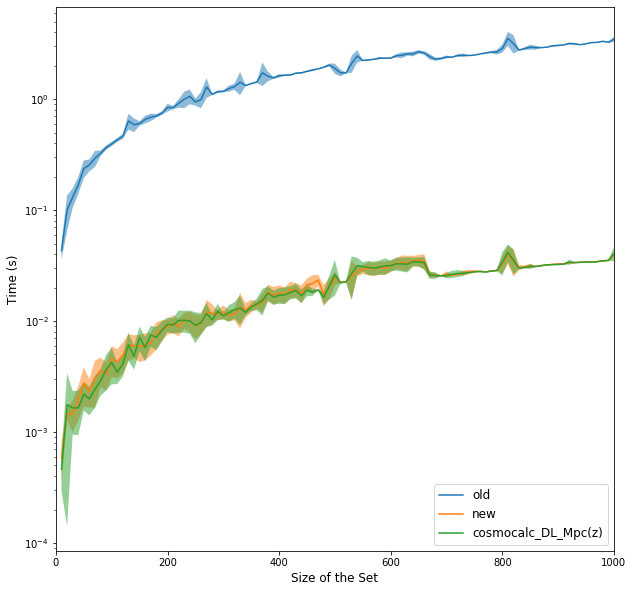

In [209]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
n = range(10, 1010, 10)

old = np.array(all_t_old)
error_old = np.array(all_e_t_old)

plt.fill_between(n, old + error_old, old - error_old, alpha=0.5)
plt.plot(n, old, label='old')


new1 = np.array(all_t_new1)
error_new1 = np.array(all_e_t_new1)
plt.fill_between(n, new1 + error_new1, new1 - error_new1, alpha=0.5)
plt.plot(n, new1, label='new')


new2 = np.array(all_t_new2)
error_new2 = np.array(all_e_t_new2)
plt.fill_between(n, new2 + error_new2, new2 - error_new2, alpha=0.5)
plt.plot(n, new2, label='cosmocalc_DL_Mpc(z)')

ax.set_xlabel("Size of the Set", size='large')
ax.set_ylabel("Time (s)", size='large')
ax.set_xlim(0, 1000)
#ax.set_ylim(0, 0.1)
#plt.xticks(np.arange(0, 501, 50))
#plt.yticks(np.arange(0, 1.1, 0.1))
ax.set_yscale('log')
plt.legend(prop={'size': 'large'}, loc='lower right')

plt.show()

In [11]:
import cosmocalc as old
import cosmocalcgabu as new
import numpy as np

dif = []
for i in range(1000):
    z = np.random.random(1)
    d_old = old.cosmocalc(z)['DL_Mpc'][0]
    d_new = new.cosmocalc_DL_Mpc(z)[0]
    dif.append(d_old - d_new)

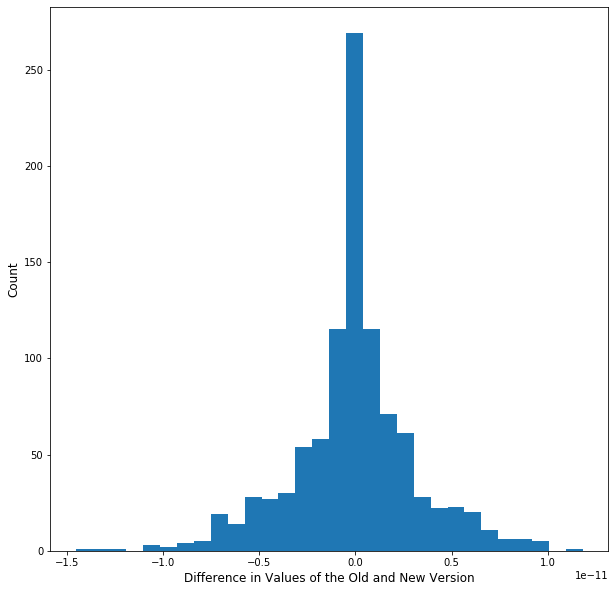

-9.694511859947851e-14 3.272263623098133e-12 1.1823431123048067e-11 -1.4551915228366852e-11


In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

plt.hist(dif, bins=30)

ax.set_xlabel("Difference in Values of the Old and New Version", size='large')
ax.set_ylabel("Count", size='large')

plt.show()

print(np.mean(dif), np.std(dif), np.max(dif), np.min(dif))

In [37]:
import cosmocalc as old
import cosmocalcgabu as new
import numpy as np
        
max_dif = []
for precision in range(10, 1001, 10):
    print(precision, end='\r')
    dif = []
    for i in range(1000):
        z = np.random.random(1)
        d_old = old.cosmocalc(z)['DL_Mpc'][0]
        d_new = new.cosmocalc_DL_Mpc(z, n=precision)[0]
        dif.append(d_old - d_new)
    max_dif.append(np.max(np.absolute(dif)))

In [53]:
max_dif[49]

0.0006687896175208152

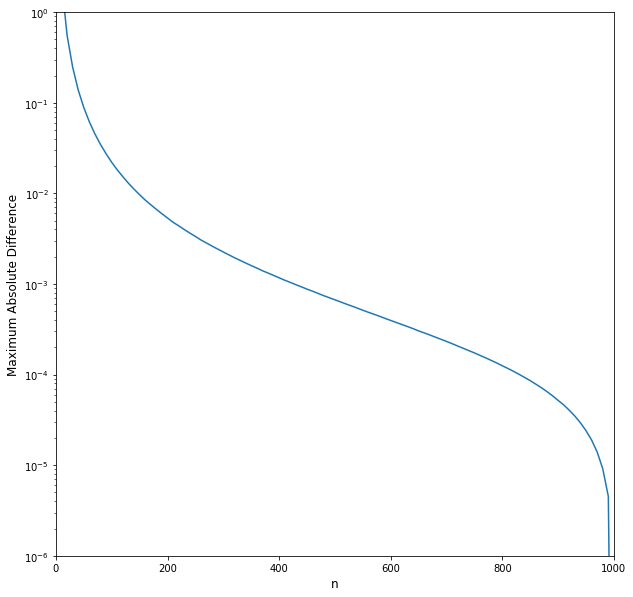

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

n = range(10, 1001, 10)

plt.plot(n, max_dif)

ax.set_xlabel("n", size='large')
ax.set_ylabel("Maximum Absolute Difference", size='large')
ax.set_xlim(0, 1000)
ax.set_ylim(1e-6, 1)

ax.set_yscale('log')

plt.show()

In [59]:
1e-9

1e-09

Sample size = 1 000

| Precision (n) | Order Error | Time (s) |
|:-------------:|:-----------:|:--------:|
|      1000     |  $10^{-12}$ | 0.055741 |
|      900      |  $10^{-5}$  | 0.040423 |
|      800      |  $10^{-4}$  | 0.049593 |
|      700      |  $10^{-4}$  | 0.038855 |
|      600      |  $10^{-4}$  | 0.037475 |
|      500      |  $10^{-4}$  | 0.036596 |
|      400      |  $10^{-3}$  | 0.030057 |
|      300      |  $10^{-3}$  | 0.017071 |
|      200      |  $10^{-3}$  | 0.013890 |
|      100      |  $10^{-2}$  | 0.007031 |


Sample size = 10 000

| Precision (n) | Order Error | Time (s) |
|:-------------:|:-----------:|:--------:|
|      1000     |  $10^{-12}$ | 0.453374 |
|      900      |  $10^{-5}$  | 0.495639 |
|      800      |  $10^{-4}$  | 0.438511 |
|      700      |  $10^{-4}$  | 0.413336 |
|      600      |  $10^{-4}$  | 0.324076 |
|      500      |  $10^{-4}$  | 0.308583 |
|      400      |  $10^{-3}$  | 0.213949 |
|      300      |  $10^{-3}$  | 0.141007 |
|      200      |  $10^{-3}$  | 0.099855 |
|      100      |  $10^{-2}$  | 0.063703 |



In [64]:
import cosmocalc as old
import cosmocalcgabu as new
import numpy as np
import time

np.random.seed(42)

print("Single value:")
t_old = []
t_new1 = []
t_new2 = []
for i in range(100):
    z = np.random.random(1)

    start_time = time.time()
    old.cosmocalc(z[0])['DL_Mpc']
    t_old.append(time.time() - start_time)
    
    start_time = time.time()
    new.cosmocalcgabu(z)['DL_Mpc']
    t_new1.append(time.time() - start_time)

    start_time = time.time()
    new.cosmocalc_DL_Mpc(z, n=500)
    t_new2.append(time.time() - start_time)

print("old:", np.mean(t_old)*1000, "±", np.std(t_old)*1000)
print("new1:", np.mean(t_new1)*1000, "±", np.std(t_new1)*1000)
print("new2:", np.mean(t_new2)*1000, "±", np.std(t_new2)*1000)

Single value:
old: 4.332363605499268 ± 1.7179310990501728
new1: 0.4415130615234375 ± 0.21293389202034835
new2: 0.1553487777709961 ± 0.08893711724841301


In [67]:
4.332363605499268/0.1553487777709961

27.88797998710826

In [65]:
t_old = []
t_new1 = []
t_new2 = []

np.random.seed(42)
print("1000 values:")
for i in range(100):
    print(i, end='\r')
    zz = np.random.random(1000)

    start_time = time.time()
    for z in zz:
        old.cosmocalc(z)['DL_Mpc']
    t_old.append(time.time() - start_time)

    start_time = time.time()
    new.cosmocalc_DL_Mpc(zz)
    t_new1.append(time.time() - start_time)

    start_time = time.time()
    new.cosmocalc_DL_Mpc(zz, n=500)
    t_new2.append(time.time() - start_time)
    
print("old:", np.mean(t_old)*1000, "±", np.std(t_old)*1000)
print("new1:", np.mean(t_new1)*1000, "±", np.std(t_new1)*1000)
print("new2:", np.mean(t_new2)*1000, "±", np.std(t_new2)*1000)

1000 values:
old: 4027.9128003120422 ± 383.2623226903219
new1: 39.16295289993286 ± 6.362957209481856
new2: 19.60639238357544 ± 3.628481607625969


In [66]:
4027.9128003120422/19.60639238357544

205.43875290827512

# Comparison distances

In [139]:
import numpy as np

def cosmocalc_DL_Mpc(z, H0=71, WM=0.27, WV=None, n=1000):
    c = 299792.458

    z = np.array(z)
    z = z.reshape((z.size, 1))

    if WV is None:
        WV = 1.0 - WM - 0.4165/(H0*H0)  # Omega(vacuum) or lambda

    h = H0/100.0
    WR = 4.165E-5/(h*h)   # includes 3 massless neutrino species, T0 = 2.72528
    WK = 1.0 - WM - WR - WV
    az = 1.0/(1.0 + 1.0*z)

    points = np.arange(n)

    # do integral over a=1/(1+z) from az to 1 in n steps, midpoint rule
    a = az + (1 - az)*(points + 0.5)/n
    adot = np.sqrt(WK + (WM/a) + (WR/np.power(a, 2)) + (WV*np.power(a, 2)))
    DCMR = np.sum(1.0/(a*adot), axis=1)
    DCMR = ((1.0 - az)[:].T*DCMR[:])/n

    x = np.sqrt(np.absolute(WK))*DCMR
    x = x.reshape((x.size,))
    yes = np.where(x > 0.1)
    if WK > 0:
        tan_ratio_yes = np.sinh(x[yes])/x[yes]
    else:
        tan_ratio_yes = np.sin(x[yes])/x[yes]

    no = np.where(x <= 0.1)
    y = np.power(x[no], 2)
    if WK < 0:
        y = -y
    tan_ratio_no = 1.0 + y/6.0 + np.power(y, 2)/120.0

    tan_ratio = np.zeros(x.size)
    tan_ratio[yes] = tan_ratio_yes
    tan_ratio[no] = tan_ratio_no

    DCMT = tan_ratio*DCMR

    DA = az[:].T*DCMT[:]
    DL = (1/np.power(az, 2))[:].T*DA[:]

    DL_Mpc = c/H0*DL

    return DL_Mpc[0]

z = np.arange(0.001, 1.001, 0.001)
z.size

lum_dis = cosmocalc_DL_Mpc(z, H0=67.66, WM=0.3111, WV=0.6889, n=1000)
c = 299792.458
H_0 = 67.66
zp1_squared = np.square(z + 1)
v = ((zp1_squared - 1)*c)/(zp1_squared + 1)
hub_dis = v/H_0

1000 1000


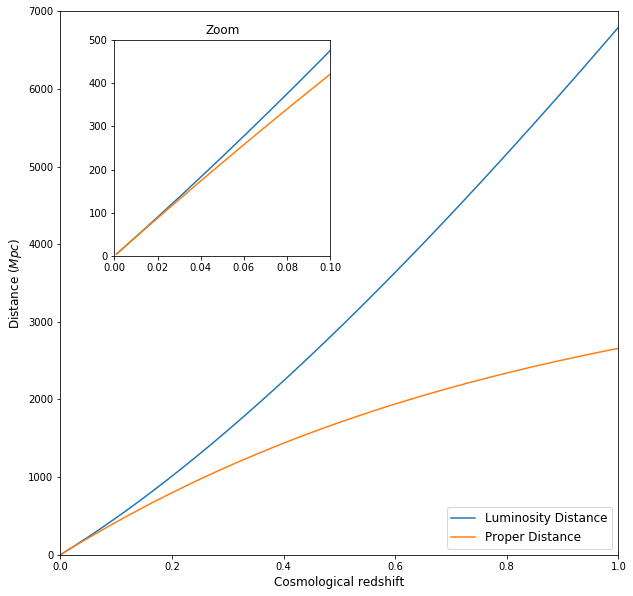

In [140]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(z, lum_dis, label='Luminosity Distance')
plt.plot(z, hub_dis, label='Proper Distance')

ax.set_xlabel("Cosmological redshift", size='large')
ax.set_xlim(0, 1)
ax.set_ylabel("Distance ($Mpc$)", size='large')
ax.set_ylim(0, 7000)

plt.legend(prop={'size': 'large'}, loc='lower right')


# Zoom plot
a = plt.axes([0.2, 0.54, 0.3, 0.3])
plt.plot(z, lum_dis)
plt.plot(z, hub_dis)
plt.title('Zoom')
plt.xlim(0, 0.1)
plt.ylim(0, 500)

plt.show()

In [135]:
z = 0.01
lum_dis = cosmocalc_DL_Mpc(z, H0=67.66, WM=0.3111, WV=0.6889, n=1000)
c = 299792.458
H_0 = 67.66
zp1_squared = np.square(z + 1)
v = ((zp1_squared - 1)*c)/(zp1_squared + 1)
hub_dis = v/H_0
print(lum_dis[0], hub_dis)
print((hub_dis - lum_dis[0])/lum_dis[0]*100)

44.64711248430789 44.08713714342014
-1.254225211282292


In [6]:
import csv

x = []
y = []
with open('/mnt/sda4/University/ELTE/Thesis/Data/expansion_map.txt', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    for row in spamreader:
        if row != []:
            x.append(int(row[0]))
            y.append(float(row[1]))

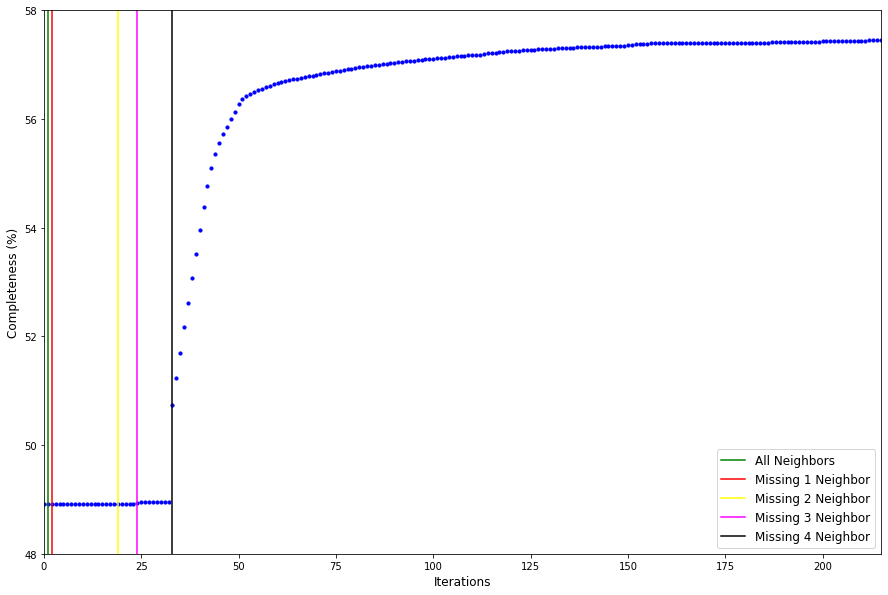

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))

plt.axvline(x=1, ymin=0, ymax=1, label='All Neighbors', c='green')
plt.axvline(x=2, ymin=0, ymax=1, label='Missing 1 Neighbor', c='red')
plt.axvline(x=19, ymin=0, ymax=1, label='Missing 2 Neighbor', c='yellow')
plt.axvline(x=24, ymin=0, ymax=1, label='Missing 3 Neighbor', c='magenta')
plt.axvline(x=33, ymin=0, ymax=1, label='Missing 4 Neighbor', c='black')

plt.scatter(x, y, s=10, c='blue')

plt.legend(prop={'size': 'large'}, loc='lower right')

ax.set_xlabel("Iterations", size='large')
ax.set_xlim(0, 215)
ax.set_ylabel("Completeness (%)", size='large')
ax.set_ylim(48, 58)

plt.show()